<a href="https://colab.research.google.com/github/Brainnext/e-commerce-recommendation-engine/blob/main/E_commerce_Recommendation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce recommendation system

The main goal is to build a product recommendation engine that suggests items to customers based on their behavior, leading to increased sales and customer engagement. You'll be building a system that can be deployed within a company

### Mounting my drive to be able to call the dataset from the rive directly from colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Unzipping the archive.zip files into appropraite folders for use.

In [3]:
import os
import zipfile

# wanna unzip the zip file

zip_path="/content/drive/MyDrive/Recommend/archive.zip"
extract_path="/content/drive/MyDrive/Recommend"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print ("Files unzipped successfully")
print ("Extracted files:", os.listdir(extract_path))

Files unzipped successfully
Extracted files: ['archive.zip', 'departments.csv', 'aisles.csv', 'order_products__prior.csv', 'order_products__train.csv', 'orders.csv', 'products.csv']


### Using pandas library to read the unzipped csv files

In [4]:
import pandas as pd

# Loading the dataset

aisles = pd.read_csv(os.path.join(extract_path, 'aisles.csv'))
departments = pd.read_csv(os.path.join(extract_path, 'departments.csv'))
order_products__prior = pd.read_csv(os.path.join(extract_path, 'order_products__prior.csv'))
order_products__train = pd.read_csv(os.path.join(extract_path, 'order_products__train.csv'))
orders = pd.read_csv(os.path.join(extract_path, 'orders.csv'))
products = pd.read_csv(os.path.join(extract_path, 'products.csv'))


### Displaying the first 5 elements in one of the csv files to know if it was successfully read.

In [5]:
print (aisles.head(5))

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
print (products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [7]:
print (departments.head(5))

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## EDA Data Merging of the csv files

In [8]:
# Merging products qwith aisles and departments

products_aisles = pd.merge(products, aisles, on='aisle_id')
products_merged = pd.merge(products_aisles, departments, on='department_id')

In [9]:
print (products_merged.head(2))

   product_id                product_name  aisle_id  department_id  \
0           1  Chocolate Sandwich Cookies        61             19   
1           2            All-Seasons Salt       104             13   

               aisle department  
0      cookies cakes     snacks  
1  spices seasonings     pantry  


In [10]:
print (order_products__prior.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


In [11]:
# Merge prior order details with product info
orders_products_merge = pd.merge(order_products__prior, products_merged, on='product_id')
print (orders_products_merge.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  
0        86             16                eggs  dairy eggs  
1        83              4    fresh vegetables     produce  
2       104             13   spices seasonings      pantry  
3        19             13       oils vinegars      pantry  
4        17             13  baking ingredients      pantry  


In [12]:
print (orders.head(5))

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [13]:
final_df =pd.merge(orders_products_merge, orders, on='order_id')
print (final_df.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

order_counts = final_df.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()
order_counts_pivot = order_counts.pivot_table('order_dow', 'order_hour_of_day', 'order_id')

order_counts_pivot = order_counts_pivot.fillna(0)

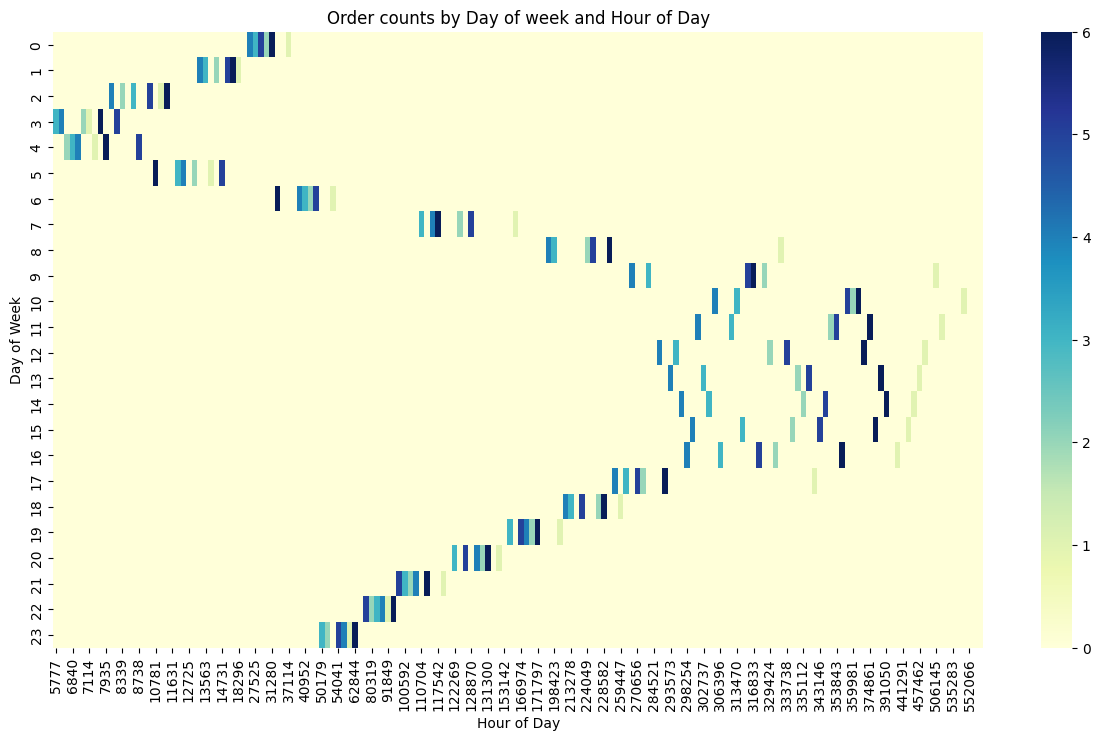

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(order_counts_pivot, cmap='YlGnBu')
plt.title('Order counts by Day of week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

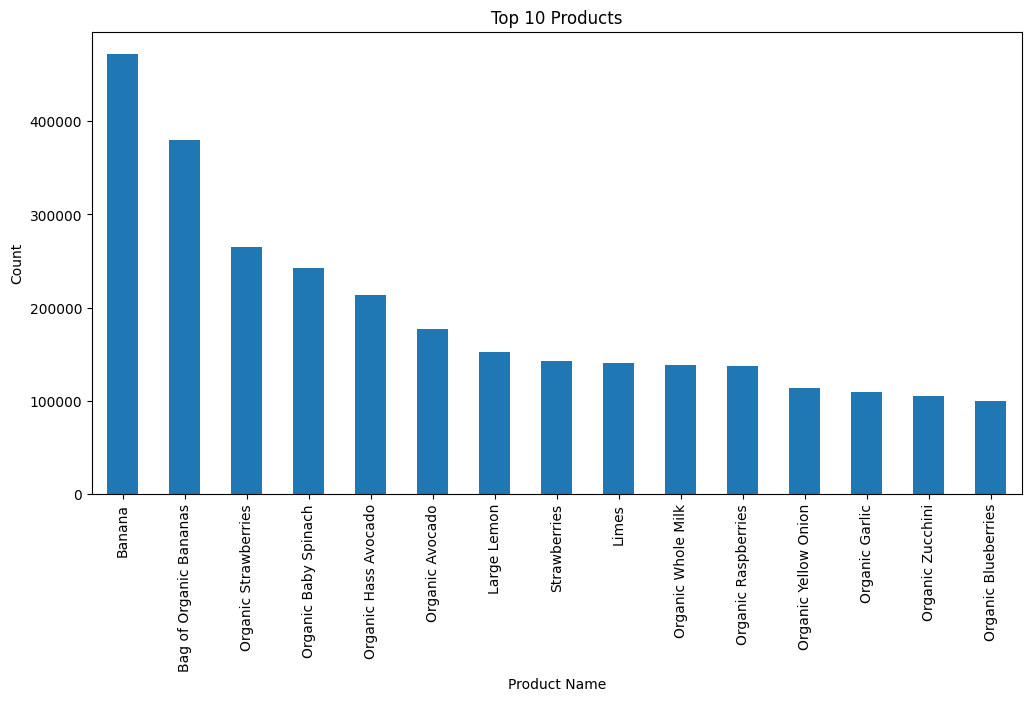

In [36]:
top_10_products = final_df['product_name'].value_counts().nlargest(15)
plt.figure(figsize=(12,6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

In [38]:
product_per_order = final_df.groupby('order_id')['product_id'].count()
average_products_per_order = product_per_order.mean()
print ("\n Trying to find the number of products per order ")
print (f"\n The average number of products per order is: {average_products_per_order} ")


 Trying to find the number of products per order 

 The average number of products per order is: 10.088883421247614 


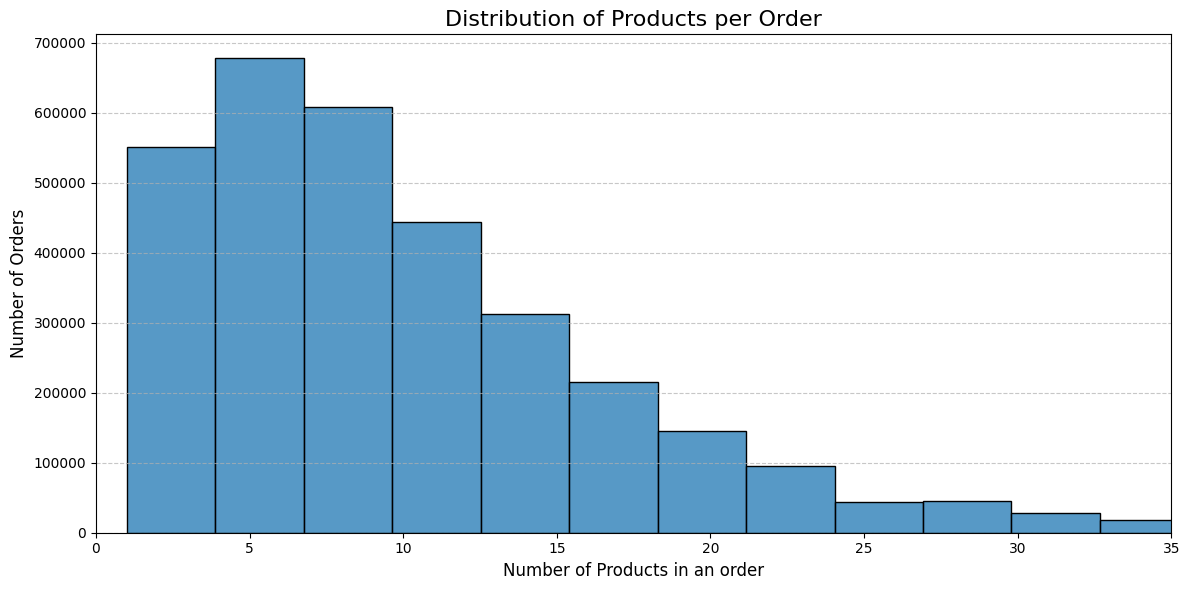

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(product_per_order, bins=50, kde=False)
plt.title('Distribution of Products per Order', fontsize=16)
plt.xlabel('Number of Products in an order', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlim(0, product_per_order.quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('products_per_order_histogram.png')

In [53]:
# Calculating the most popular aisles by number of unique orders

popular_aisles = final_df.groupby('aisle')['order_id'].nunique().sort_values(ascending=False)
print (f"\n ----- The top 10 most Aisles by number of unique orders are: {popular_aisles.head(10)}-----")


 ----- The top 10 most Aisles by number of unique orders are: aisle
fresh fruits                     1790771
fresh vegetables                 1427631
packaged vegetables fruits       1179243
yogurt                            847081
milk                              785987
packaged cheese                   737899
water seltzer sparkling water     614081
soy lactosefree                   545714
chips pretzels                    538052
bread                             527129
Name: order_id, dtype: int64-----


In [52]:
# Calculating aisles by least popular and patronized

least_popular_aisles = final_df.groupby('aisle')['order_id'].nunique().sort_values(ascending=True)
print (f"----The 10 least popular aisles is {least_popular_aisles.head(10)}")

----The 10 least popular aisles is aisle
frozen juice                  4239
beauty                        5837
baby bath body care           7956
baby accessories              8078
eye ear care                  8619
kitchen supplies              8772
skin care                     9185
shave needs                   9526
first aid                     9570
specialty wines champagnes    9885
Name: order_id, dtype: int64
